<a href="https://colab.research.google.com/github/arialjrr/feline_traits_project/blob/main/Feline_Traits_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# data prepare
data = pd.read_excel("/content/Feline_dataset.xlsx", sheet_name="Dataset", engine='openpyxl')

In [ ]:
data = data[['CATID','BREEDGROUP','SEX','AGE_BEHAVIOUR','OTHER_CATS','problematic_behavior', 'fearfulness','human_aggression','activity_playfulness', 'cat_sociability','human_sociability', 'litterbox_issues', 'excessive_grooming']]
# remove rows that contain unknow in any column
data = data[~data.applymap(lambda x: x == 'unknown').any(axis=1)]
data

,CATID,BREEDGROUP,SEX,AGE_BEHAVIOUR,OTHER_CATS,problematic_behavior,fearfulness,human_aggression,activity_playfulness,cat_sociability,human_sociability,litterbox_issues,excessive_grooming
2,3,Oriental,Female,7.419576,NO,A_little,-0.480038,-0.288479,0.583600,0.183466,1.313598,-0.127347,-0.009533
3,4,Sphynx_and_Devon_Rex,Female,2,YES,No,-0.876063,-0.696218,1.255442,0.899894,0.475639,-0.514913,-0.259347
4,5,House_cat,Female,3.535049,YES,A_little,-0.746316,-0.619940,-0.578864,-0.337497,-0.333070,3.084435,-0.113739
5,6,European,Female,0.663014,YES,No,0.379262,-0.812642,0.343483,0.722727,-0.502684,-1.142007,-0.659040
6,7,Bengal,Female,13.206101,NO,A_lot,2.831127,1.454686,-1.134145,0.955988,-1.917538,3.564773,2.186920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,4396,Turkish_Angora,Male,0.322404,YES,No,-1.235023,-0.083885,1.231536,0.731947,0.274973,-0.695746,-0.420150
4308,4397,Turkish_Angora,Female,0.325137,YES,No,-1.363337,0.949306,0.963164,0.565346,0.400883,-0.847639,-0.473137
4309,4399,Landrace_Cat_Shorthair,Female,0.326027,NO,No,0.332575,-0.836463,0.957544,0.033670,0.774068,0.033412,-0.416599
4310,4400,Landrace_Cat_Shorthair,Male,0.330601,NO,Some,-0.733640,-0.104022,1.205223,-0.164490,1.376401,-0.488070,0.453249


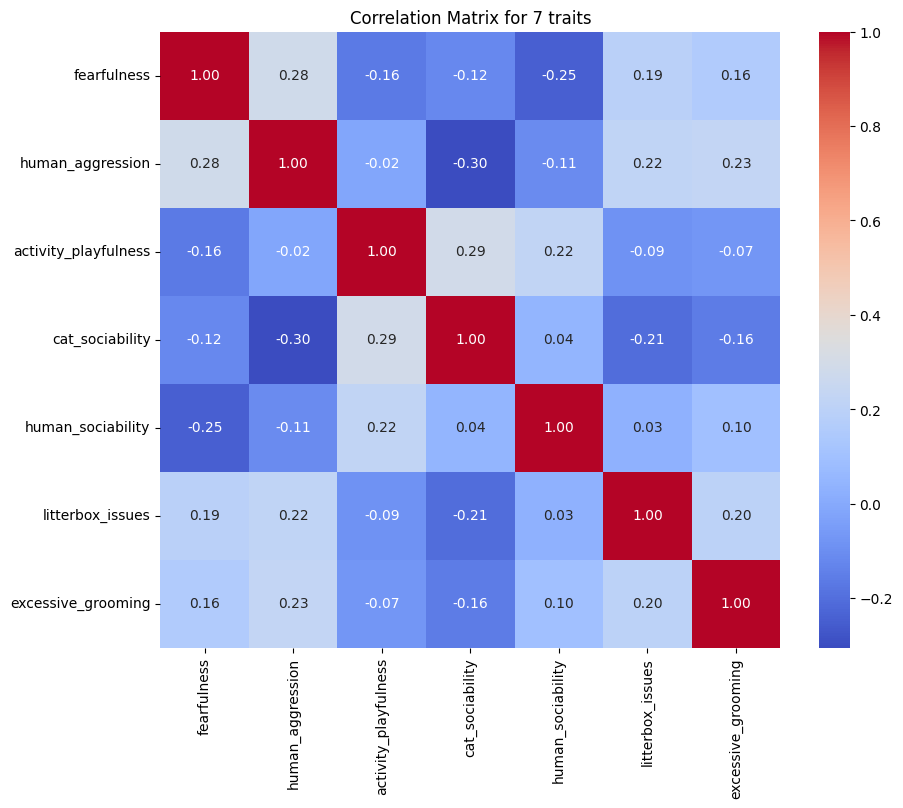

In [ ]:
# check correlation for traits
factor_corr = data[['fearfulness','human_aggression','activity_playfulness', 'cat_sociability','human_sociability','litterbox_issues','excessive_grooming']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(factor_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix for 7 traits")
plt.show()

# Part 1, Clustering

## Clustering: Finding a cat breed or several breeds that best fit me according to the survey data.

Because this would be my first pet, I will focus on data marked as 'No' in 'OTHER_CATS' column, naming it the 'single cat dataset'.

In [ ]:
single_cat = data[data['OTHER_CATS'] == 'NO']
single_cat.head()

,CATID,BREEDGROUP,SEX,AGE_BEHAVIOUR,OTHER_CATS,problematic_behavior,fearfulness,human_aggression,activity_playfulness,cat_sociability,human_sociability,litterbox_issues,excessive_grooming
2,3,Oriental,Female,7.419576,NO,A_little,-0.480038,-0.288479,0.583600,0.183466,1.313598,-0.127347,-0.009533
6,7,Bengal,Female,13.206101,NO,A_lot,2.831127,1.454686,-1.134145,0.955988,-1.917538,3.564773,2.186920
7,8,Siamese_and_Balinese,Female,0.349727,NO,No,-1.008219,-0.673436,1.421480,0.341644,0.850675,0.910663,-0.338755
23,26,House_cat,Female,2.534247,NO,A_little,0.044896,-0.466319,1.015770,-0.212362,0.900958,-0.623151,-0.965962
33,37,Landrace_Cat_Shorthair,Female,0.632877,NO,A_little,-0.254196,-0.201356,0.857084,-0.209742,0.978938,-0.647336,-0.407669


In [ ]:
single_breed_avg = single_cat[['BREEDGROUP','fearfulness','human_aggression','activity_playfulness','human_sociability','excessive_grooming']].groupby('BREEDGROUP').mean().reset_index()

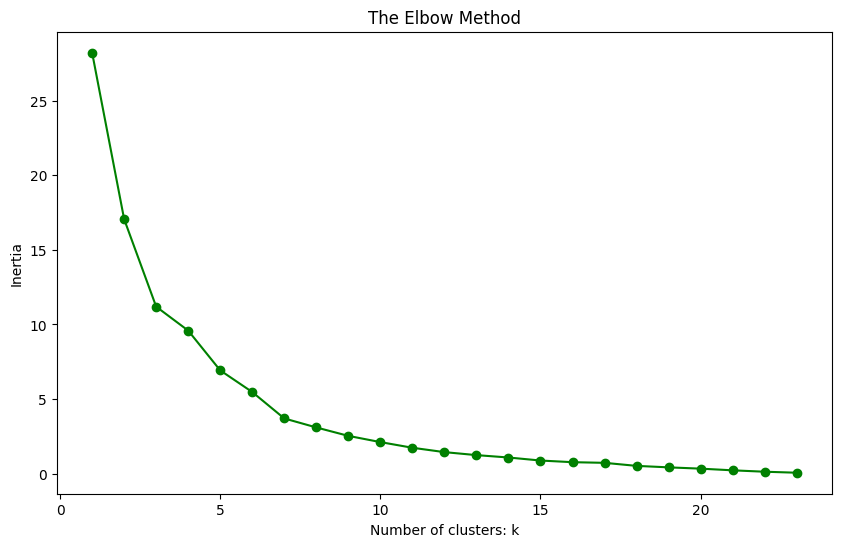

In [ ]:
# using k-means Clustering first to get clusters
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia_list = []
features = single_breed_avg[['fearfulness','human_aggression','activity_playfulness','human_sociability','excessive_grooming']]

for k in range(1, 24):
  kmeans_classifier = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans_classifier.fit(features)
  inertia_list.append(kmeans_classifier.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 24), inertia_list, marker='o', color='green')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters: k')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# set k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
single_breed_avg['Cluster'] = kmeans.fit_predict(features)

for i in range(kmeans.n_clusters):
    cluster_data = single_breed_avg[single_breed_avg['Cluster'] == i]
    print(f"\nCluster {i} feature averages:")
    print(cluster_data[['fearfulness', 'human_aggression', 'activity_playfulness', 'human_sociability','excessive_grooming']].mean())

# Breed Composition
for i in range(kmeans.n_clusters):
    print(f"\nBreed composition in cluster {i}:")
    print(single_breed_avg[single_breed_avg['Cluster'] == i]['BREEDGROUP'])


Cluster 0 feature averages:
fearfulness            -0.037438
human_aggression        0.040675
activity_playfulness    0.167650
human_sociability       0.123293
excessive_grooming     -0.032658
dtype: float64

Cluster 1 feature averages:
fearfulness            -1.362075
human_aggression        2.442408
activity_playfulness    1.658435
human_sociability       1.490214
excessive_grooming      0.858780
dtype: float64

Cluster 2 feature averages:
fearfulness            -0.738586
human_aggression       -0.357360
activity_playfulness    0.737435
human_sociability       0.638718
excessive_grooming      0.215575
dtype: float64

Breed composition in cluster 0:
2                           Bengal
3                          British
5                      Cornish_Rex
6                         European
7                        House_cat
8            Landrace_Cat_Longhair
9           Landrace_Cat_Shorthair
10                      Maine_Coon
11            Norwegian_Forest_Cat
12                       

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from tabulate import tabulate

cluster_table = [
    ['Cluster','fearfulness','human aggression','activity/playfulness','human sociability','excessive grooming'],
    ['Cluster 0', 'Average', 'Low', 'Average', 'Average','Low'],
    ['Cluster 1', 'Lowest', 'High', 'Highest', 'Highest', 'High'],
    ['Cluster 2', 'Low','Lowest', 'High', 'High','Average']
]
print(tabulate(cluster_table, tablefmt="grid"))

+-----------+-------------+------------------+----------------------+-------------------+--------------------+
| Cluster   | fearfulness | human aggression | activity/playfulness | human sociability | excessive grooming |
+-----------+-------------+------------------+----------------------+-------------------+--------------------+
| Cluster 0 | Average     | Low              | Average              | Average           | Low                |
+-----------+-------------+------------------+----------------------+-------------------+--------------------+
| Cluster 1 | Lowest      | High             | Highest              | Highest           | High               |
+-----------+-------------+------------------+----------------------+-------------------+--------------------+
| Cluster 2 | Low         | Lowest           | High                 | High              | Average            |
+-----------+-------------+------------------+----------------------+-------------------+--------------------+


**Cluster 0: The Moderate Cats**

* Fearfulness: Average - unlikely to be either overly bold or excessively timid.
* Human Aggression: Low - these cats are generally peaceful and approachable.
* Activity/Playfulness: Average - they enjoy play but aren't excessively energetic.
* Human Sociability: Average - friendly without being too demanding.
* Excessive Grooming: Low - not prone to stress-related grooming behavior.

Owners looking for an even-tempered and adaptable cat might find this cluster ideal. These cats are likely to fit easily into many types of homes.

**Cluster 1: The Bold and Demanding**

* Fearfulness: Low - they're very confident and unlikely to be startled or scared.
* Human Aggression: High - potential for assertive or dominant behaviors that require management.
* Activity/Playfulness: High - very energetic and needing engagement.
* Human Sociability: High - they enjoy lots of attention and social interaction.
* Excessive Grooming: High - may have stress-related grooming habits that need attention.

This cluster might be a match for experienced cat owners who can provide ample interaction and handle a more challenging personality.

**Cluster 2: The Easy-going Playmates**

* Fearfulness: Low - they're composed and unbothered by much.
* Human Aggression: Low - gentle, making them suitable for homes with children or other pets.
* Activity/Playfulness: High - enjoy playing and can be quite active.
* Human Sociability: High - they like company and being around people.
* Excessive Grooming: Average - some grooming behavior, but not overly excessive.

Ideal for those seeking a friendly and active cat companion, Cluster 2 cats are likely to provide playful interaction and affection without the extremes of behavior.

# Part two, stats analysis

## Study how cats's aggression towards human change as they age
Cluster 2 cats data used

In [ ]:
# getting dataset of cats that other cats living in the same household and are in cluster 2
cluster_2_breeds_list = single_breed_avg[single_breed_avg['Cluster'] == 2]['BREEDGROUP']
cluster_2_cats = data[data['BREEDGROUP'].isin(cluster_2_breeds_list)]
cluster_2_cats_filtered = cluster_2_cats
cluster_2_cats_filtered['AGE_BEHAVIOUR'] = pd.to_numeric(cluster_2_cats_filtered['AGE_BEHAVIOUR'], errors='coerce')
cluster_2_cats_filtered = cluster_2_cats.dropna(subset=['AGE_BEHAVIOUR'])

<ipython-input-85-82db387b5b09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_cats_filtered['AGE_BEHAVIOUR'] = pd.to_numeric(cluster_2_cats_filtered['AGE_BEHAVIOUR'], errors='coerce')


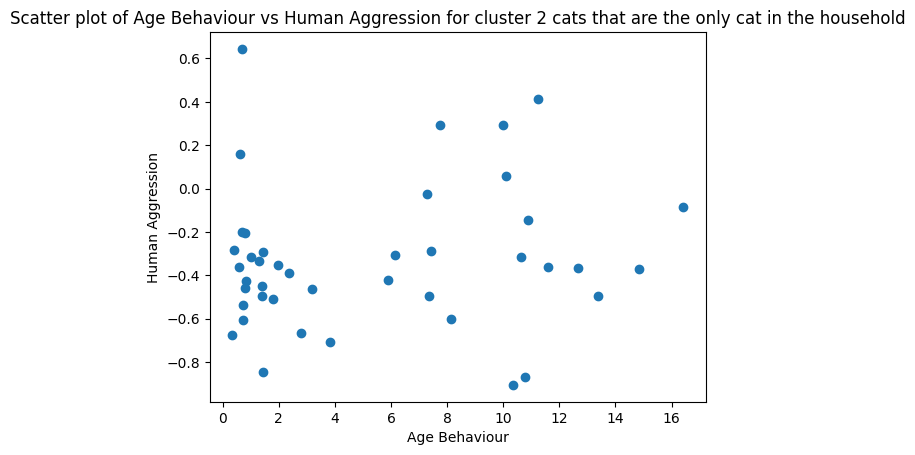

Correlation coefficient: 0.12668436849973227, P-value: 0.4240235291241561


In [ ]:
from scipy import stats

# only cat in the house, the correlation with age and aggression
cluster_2_cats_single = cluster_2_cats_filtered[cluster_2_cats_filtered['OTHER_CATS'] == 'NO']
x_age = cluster_2_cats_single['AGE_BEHAVIOUR']
y_human_agg = cluster_2_cats_single['human_aggression']

plt.scatter(x_age, y_human_agg)
plt.title('Scatter plot of Age Behaviour vs Human Aggression for cluster 2 cats that are the only cat in the household')
plt.xlabel('Age Behaviour')
plt.ylabel('Human Aggression')
plt.show()

correlation_coef, p_value = stats.pearsonr(x_age, y_human_agg)
print(f"Correlation coefficient: {correlation_coef}, P-value: {p_value}")

 While there is a slight positive trend as seen in the scatter plot, the relationship between age behavior and human aggression for cluster 2 cats that are the only cat in the household is not strong enough to be considered statistically significant based on the data provided.

 Based on the data at hand, there is no enough evidence to support the hypothesis that age behavior is linked to human aggression for these specific cats.

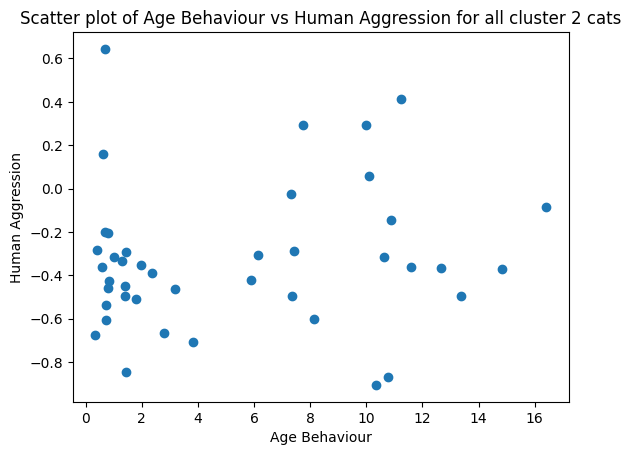

Correlation coefficient: 0.017347877822129605, P-value: 0.7133072660039542


In [ ]:

x_age_1 = cluster_2_cats_filtered['AGE_BEHAVIOUR']
y_human_agg_1 = cluster_2_cats_filtered['human_aggression']

plt.scatter(x_age, y_human_agg)
plt.title('Scatter plot of Age Behaviour vs Human Aggression for all cluster 2 cats')
plt.xlabel('Age Behaviour')
plt.ylabel('Human Aggression')
plt.show()

correlation_coef_1, p_value_1 = stats.pearsonr(x_age_1, y_human_agg_1)
print(f"Correlation coefficient: {correlation_coef_1}, P-value: {p_value_1}")

## hypothesis: Female cats more fearful



In [ ]:
cluster_2_cats.head()

,CATID,BREEDGROUP,SEX,AGE_BEHAVIOUR,OTHER_CATS,problematic_behavior,fearfulness,human_aggression,activity_playfulness,cat_sociability,human_sociability,litterbox_issues,excessive_grooming
2,3,Oriental,Female,7.419576,NO,A_little,-0.480038,-0.288479,0.583600,0.183466,1.313598,-0.127347,-0.009533
3,4,Sphynx_and_Devon_Rex,Female,2.000000,YES,No,-0.876063,-0.696218,1.255442,0.899894,0.475639,-0.514913,-0.259347
7,8,Siamese_and_Balinese,Female,0.349727,NO,No,-1.008219,-0.673436,1.421480,0.341644,0.850675,0.910663,-0.338755
9,10,Siamese_and_Balinese,Female,3.178645,YES,No,-0.816127,-0.855875,-0.276732,0.507463,0.366095,-0.236426,-0.610978
10,12,Burmese,Female,1.663014,YES,A_little,-0.813447,0.168712,1.363108,0.718478,0.661025,-0.545538,-0.033225


In [ ]:
fear_female = cluster_2_cats[cluster_2_cats['SEX'] == 'Female']['fearfulness']
fear_male = cluster_2_cats[cluster_2_cats['SEX'] == 'Male']['fearfulness']
levene_stat, levene_p = stats.levene(fear_female, fear_male)
print(f"Levene's Test p-value: {levene_p}")

if levene_p < 0.05:
    # Variances are not equal, use Welch’s t-test
    t_stat, p_value = stats.ttest_ind(fear_female, fear_male, equal_var=False)
    test_used = "Welch's t-test"
else:
    # Variances are equal, use standard t-test
    t_stat, p_value = stats.ttest_ind(fear_female, fear_male, equal_var=True)
    test_used = "Standard t-test"

print(f"{test_used} results - T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Statistically significant difference in fearfulness between female and male cats.")
else:
    print("No statistically significant difference in fearfulness between female and male cats.")

Levene's Test p-value: 0.6111910284112152
Standard t-test results - T-statistic: 0.4645397705370269, P-value: 0.642486243700363
No statistically significant difference in fearfulness between female and male cats.


No statistically significant difference in fearfulness between female and male cats.

## hypothesis: Fearful cats less sociable

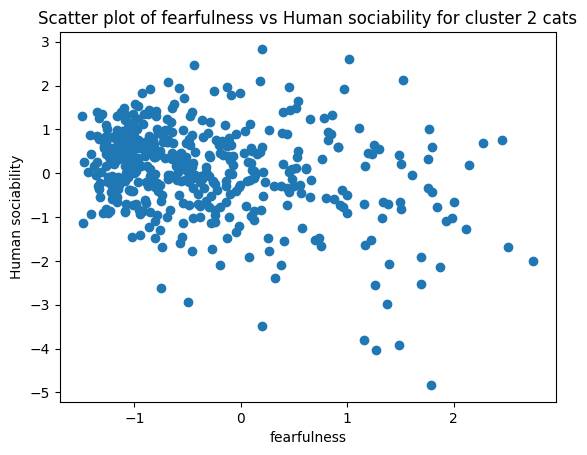

Correlation coefficient: -0.28031579879469026, P-value: 1.3751457940249089e-09


In [ ]:
# sociability toward human
x_fear = cluster_2_cats['fearfulness']
y_human_soci = cluster_2_cats['human_sociability']

plt.scatter(x_fear, y_human_soci)
plt.title('Scatter plot of fearfulness vs Human sociability for cluster 2 cats')
plt.xlabel('fearfulness')
plt.ylabel('Human sociability')
plt.show()

correlation_coef_fs, p_value_fs = stats.pearsonr(x_fear, y_human_soci)
print(f"Correlation coefficient: {correlation_coef_fs}, P-value: {p_value_fs}")

The results suggest a statistically significant but mild negative(-0.28) relationship between fearfulness and human sociability in cluster 2 cats. This could imply that more fearful cats are less sociable towards humans. This might also have implications for handling strategies, adoption suitability assessments, or welfare considerations where individual cat's fearfulness and sociability levels are taken into account.

## hypothesis: Fearful cats less active/playful  

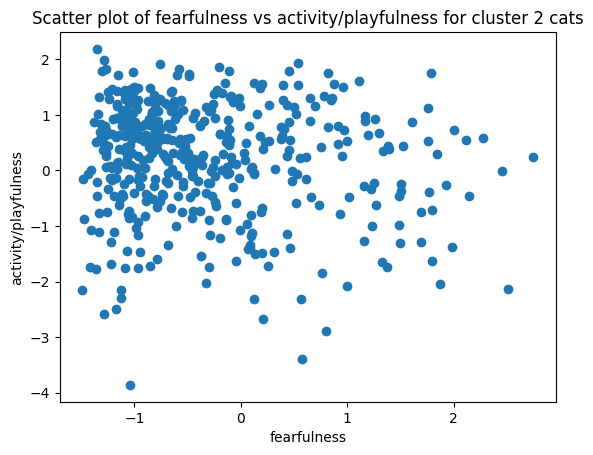

Correlation coefficient: -0.12362066269822988, P-value: 0.008586213539827013


In [ ]:
x_fear = cluster_2_cats['fearfulness']
y_play = cluster_2_cats['activity_playfulness']

plt.scatter(x_fear, y_play)
plt.title('Scatter plot of fearfulness vs activity/playfulness for cluster 2 cats')
plt.xlabel('fearfulness')
plt.ylabel('activity/playfulness')
plt.show()

correlation_coef_fp, p_value_fp = stats.pearsonr(x_fear, y_play)
print(f"Correlation coefficient: {correlation_coef_fp}, P-value: {p_value_fp}")

The analysis reveals a statistically significant but weak negative correlation between fearfulness and activity/playfulness in cluster 2 cats. This relationship suggests that more fearful cats may be somewhat less playful and active.

## Relationships of numerical variables (fearfulness, human aggression, activity/playfulness, human_sociability,litterbox_issues, excessive_grooming) and whether cats living with other cats

only cat in the household = 0,
living with other cats = 1

In [ ]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

features = ['fearfulness', 'human_aggression', 'activity_playfulness', 'human_sociability', 'cat_sociability','litterbox_issues','excessive_grooming']
results = {}
for feature in features:
  group1 = data[data['OTHER_CATS'] == 'NO'][feature]
  group2 = data[data['OTHER_CATS'] == 'YES'][feature]
  levene_stat, levene_p = stats.levene(group1, group2)

  if levene_p < 0.05:
      # Variances are not equal, use Welch's t-test
      t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
  else:
      # Variances are equal, use standard t-test
      t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=True)

  results[feature] = p_value

for feature, p in results.items():
  print(f'{feature}: p-value = {p}')

# If p < 0.05 after correcting for multiple comparisons, the difference is statistically significant.

alpha = 0.05 / len(features)
significant_features = {feature: p for feature, p in results.items() if p < alpha}

print('Significant features after Bonferroni correction:', significant_features)


fearfulness: p-value = 0.4981380273872057
human_aggression: p-value = 5.089056567372798e-07
activity_playfulness: p-value = 4.09368800906186e-06
human_sociability: p-value = 4.944312414091252e-17
cat_sociability: p-value = 7.591864118820005e-12
litterbox_issues: p-value = 0.19561855992129332
excessive_grooming: p-value = 0.004181268474451675
Significant features after Bonferroni correction: {'human_aggression': 5.089056567372798e-07, 'activity_playfulness': 4.09368800906186e-06, 'human_sociability': 4.944312414091252e-17, 'cat_sociability': 7.591864118820005e-12, 'excessive_grooming': 0.004181268474451675}


This means that even after adjusting for the fact that conducted multiple tests, there is still a strong indication that these 5 traits are influenced by whether a cat lives with other cats or alone.

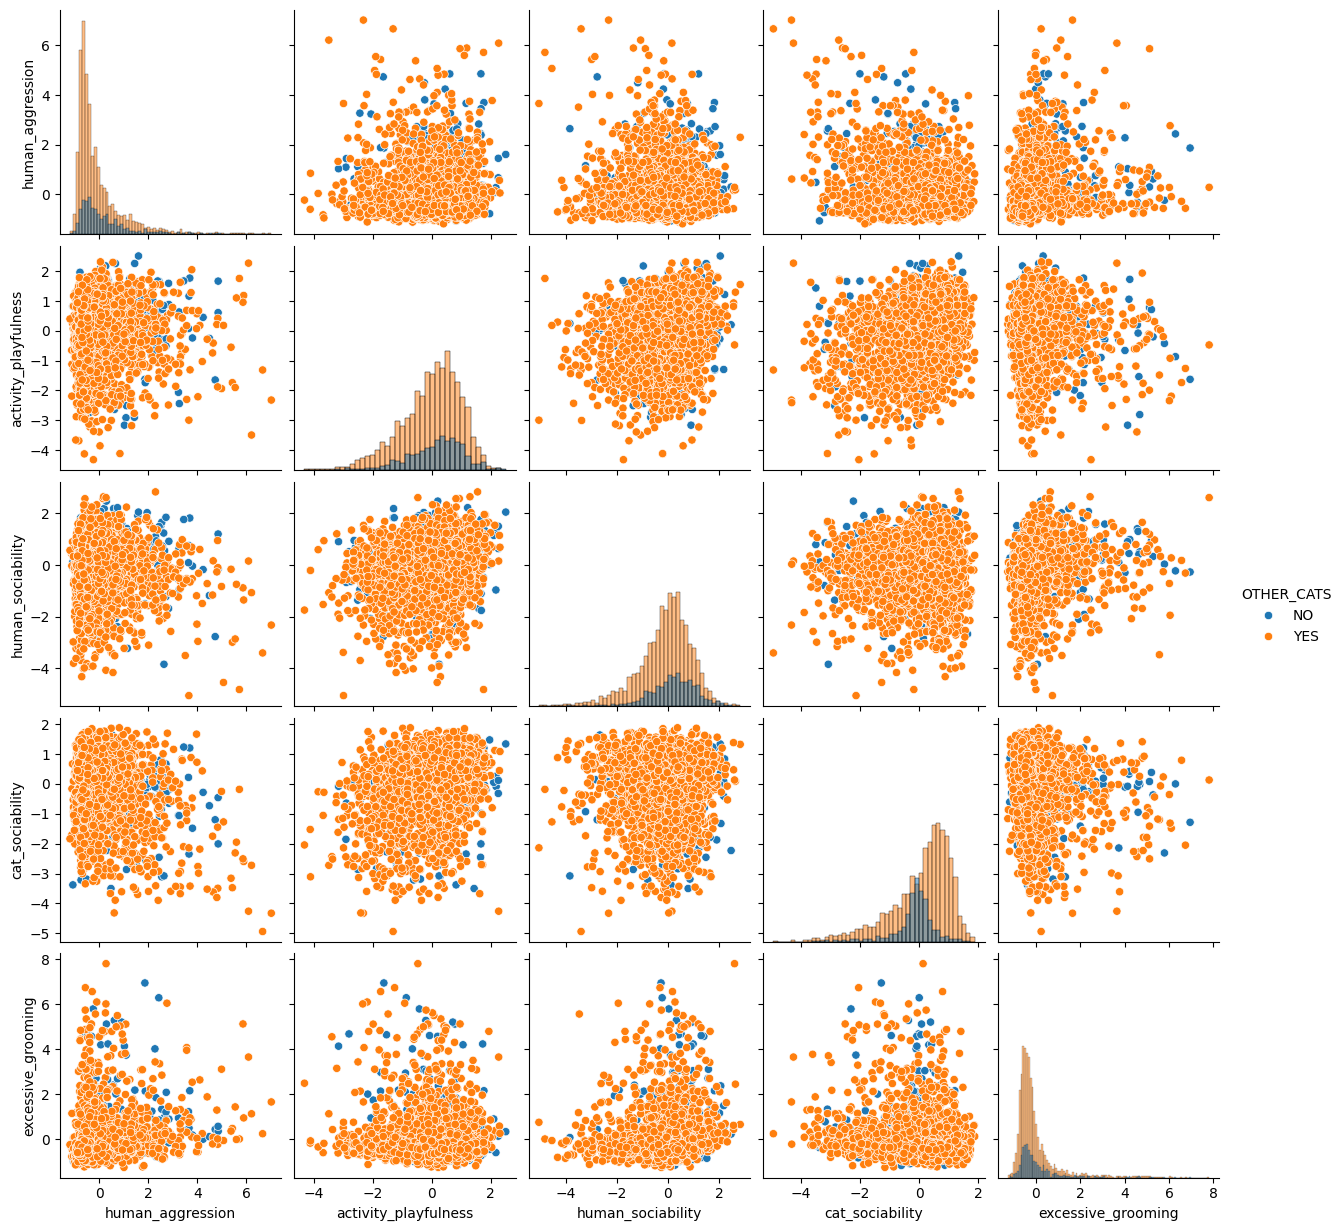

In [ ]:
cat_live_0 = data[data['OTHER_CATS'] == 'NO']
cat_live_1 = data[data['OTHER_CATS'] == 'YES']
cat_live_all = pd.concat([cat_live_0,cat_live_1])


features_live = ['OTHER_CATS', 'human_aggression', 'activity_playfulness', 'human_sociability', 'cat_sociability', 'excessive_grooming']

pair_plot = sns.pairplot(cat_live_all[features_live], hue= 'OTHER_CATS', diag_kind="hist")

plt.show()

In [ ]:
# only cat class=0

mean_human_aggression_0 = cat_live_0['human_aggression'].mean().round(2)
std_human_aggression_0 = cat_live_0['human_aggression'].std().round(2)

mean_activity_playfulness_0 = cat_live_0['activity_playfulness'].mean().round(2)
std_activity_playfulness_0 = cat_live_0['activity_playfulness'].std().round(2)

mean_human_sociability_0 = cat_live_0['human_sociability'].mean().round(2)
std_human_sociability_0 = cat_live_0['human_sociability'].std().round(2)

mean_cat_sociability_0 = cat_live_0['cat_sociability'].mean().round(2)
std_cat_sociability_0 = cat_live_0['cat_sociability'].std().round(2)

mean_excessive_grooming_0 = cat_live_0['excessive_grooming'].mean().round(2)
std_excessive_grooming_0 = cat_live_0['excessive_grooming'].std().round(2)

# cats live with other cats class=1

mean_human_aggression_1 = cat_live_1['human_aggression'].mean().round(2)
std_human_aggression_1 = cat_live_1['human_aggression'].std().round(2)

mean_activity_playfulness_1 = cat_live_1['activity_playfulness'].mean().round(2)
std_activity_playfulness_1 = cat_live_1['activity_playfulness'].std().round(2)

mean_human_sociability_1 = cat_live_1['human_sociability'].mean().round(2)
std_human_sociability_1 = cat_live_1['human_sociability'].std().round(2)

mean_cat_sociability_1 = cat_live_1['cat_sociability'].mean().round(2)
std_cat_sociability_1 = cat_live_1['cat_sociability'].std().round(2)

mean_excessive_grooming_1 = cat_live_1['excessive_grooming'].mean().round(2)
std_excessive_grooming_1 = cat_live_1['excessive_grooming'].std().round(2)

# all cats
mean_human_aggression_all = cat_live_all['human_aggression'].mean().round(2)
std_human_aggression_all = cat_live_all['human_aggression'].std().round(2)

mean_activity_playfulness_all = cat_live_all['activity_playfulness'].mean().round(2)
std_activity_playfulness_all = cat_live_all['activity_playfulness'].std().round(2)

mean_human_sociability_all = cat_live_all['human_sociability'].mean().round(2)
std_human_sociability_all = cat_live_all['human_sociability'].std().round(2)

mean_cat_sociability_all = cat_live_all['cat_sociability'].mean().round(2)
std_cat_sociability_all = cat_live_all['cat_sociability'].std().round(2)

mean_excessive_grooming_all = cat_live_all['excessive_grooming'].mean().round(2)
std_excessive_grooming_all = cat_live_all['excessive_grooming'].std().round(2)

In [ ]:
# summarize in a table
from tabulate import tabulate
living_table = [
    ['class', 'μ(human_aggression)', 'σ(human_aggression)', 'μ(activity_playfulness)', 'σ(activity_playfulness)', 'μ(human_sociability)', 'σ(human_sociability)', 'μ(cat_sociability)', 'σ(cat_sociability)','μ(excessive_grooming)', 'σ(excessive_grooming)'],
    ['0 (only cat)', mean_human_aggression_0, std_human_aggression_0, mean_activity_playfulness_0, std_activity_playfulness_0, mean_human_sociability_0, std_human_sociability_0, mean_cat_sociability_0,std_cat_sociability_0, mean_excessive_grooming_0, std_excessive_grooming_0],
    ['1', mean_human_aggression_1, std_human_aggression_1, mean_activity_playfulness_1, std_activity_playfulness_1,mean_human_sociability_1, std_human_sociability_1, mean_cat_sociability_1,std_cat_sociability_1, mean_excessive_grooming_1, std_excessive_grooming_1],
    ['all', mean_human_aggression_all, std_human_aggression_all, mean_activity_playfulness_all, std_activity_playfulness_all,mean_human_sociability_all, std_human_sociability_all, mean_cat_sociability_all, std_cat_sociability_all,mean_excessive_grooming_all, std_excessive_grooming_all]
]
print(tabulate(living_table))

------------  -------------------  -------------------  -----------------------  -----------------------  --------------------  --------------------  ------------------  ------------------  ---------------------  ---------------------
class         μ(human_aggression)  σ(human_aggression)  μ(activity_playfulness)  σ(activity_playfulness)  μ(human_sociability)  σ(human_sociability)  μ(cat_sociability)  σ(cat_sociability)  μ(excessive_grooming)  σ(excessive_grooming)
0 (only cat)  0.15                 0.97                 0.16                     0.91                     0.23                  0.87                  -0.18               0.71                0.08                   1.02
1             -0.06                0.98                 -0.03                    1.0                      -0.11                 1.02                  0.06                1.04                -0.05                  0.95
all           -0.02                0.98                 0.01                     0.99         

Findings:

In general, cats without other cats present tend to exhibit slightly higher aggression towards humans and more playfulness, whereas cats with other cats present tend to be more sociable with their feline peers and show slightly less excessive grooming.

# Part 3, classification

## Classification: general analysis of cat's problematic behaviour ( logistic, knn, LDA, SVM, Decision Tree, NB, Random Forest)
features: focus on fearfulness, human aggression, activity/playfulness, litterbox_issues, excessive_grooming

problematic_behavior: no = 0

problematic_behavior: a little/ some / a lot = 1

1. Fearfulness:
High fearfulness in cats can lead to problematic behavior such as hiding, fleeing, or defensive aggression when they feel threatened. Fearful cats may have difficulty adjusting to new environments or people, which can be challenging for a new owner to manage.
2. Human Aggression:
Cats that show aggression towards humans may scratch, bite, or hiss, which can be dangerous and create a negative experience for an owner. This behavior is particularly problematic because it makes routine handling, such as grooming or veterinary visits, difficult and stressful.
3. Activity/Playfulness:
While playfulness is generally positive, overly active and playful cats may inadvertently cause problems if their energy is not appropriately channeled. They may engage in destructive behavior, like clawing furniture or knocking items over, especially if they're not provided with enough stimulation or playtime. This can be overwhelming for an inexperienced owner who might not expect or understand the level of activity some cats require.
4. Litterbox Issues:
Inappropriate elimination outside of the litterbox is a common issue and can be one of the most challenging behaviors for cat owners to address. Problems can range from medical issues to stress-related behavior. Addressing litterbox issues often requires a nuanced understanding of cat behavior and can be a significant barrier to successful pet ownership for first-time cat owners.
5. Excessive Grooming:
Excessive grooming can be a sign of stress, allergies, skin conditions, or other health problems. It may lead to hair loss and skin lesions that require medical attention. Owners must recognize when grooming becomes excessive and seek veterinary care, which might not be straightforward for someone inexperienced with cats.

In [ ]:
# data prepare
data_pb = data
data_pb['label'] = np.where(data_pb['problematic_behavior'] == 'No', 0,
                np.where(data_pb['problematic_behavior'].isin(['A_little', 'Some', 'A_lot']), 1, np.nan))

data_pb = data_pb.dropna(subset=['label'])

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score


X_pb = data_pb[['fearfulness', 'human_aggression','activity_playfulness','litterbox_issues','excessive_grooming']]
y_pb = data_pb[['label']]
X_train_pb, X_test_pb, y_train_pb, y_test_pb = train_test_split(X_pb, y_pb, test_size=0.5, random_state=42)


In [ ]:
# logistic regression classifer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_pb)
X_train_pb_scale = scaler.transform(X_train_pb)
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X_train_pb_scale,y_train_pb)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
predicted_pb_logistic = log_reg_classifier.predict(X_test_pb)
accuracy_pb_logis = round(accuracy_score(y_test_pb,predicted_pb_logistic),2)

auc_pb_logis = round(roc_auc_score(y_test_pb,predicted_pb_logistic),2)

print("The accuracy rate of using logistic regression classifer is ", accuracy_pb_logis, "The auc score is", auc_pb_logis)

The accuracy rate of using logistic regression classifer is  0.65 The auc score is 0.63


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

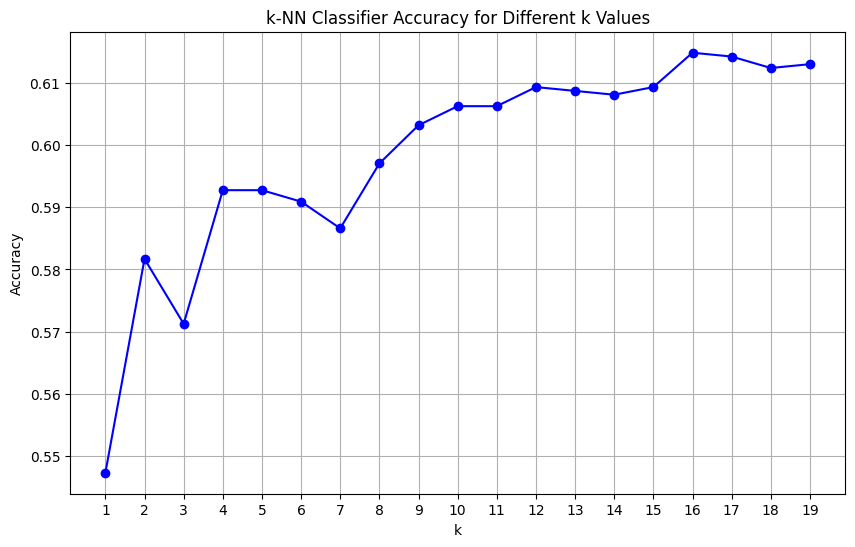

The optimal value of k is 16 with an accuracy of 0.6149


In [ ]:
# kNN classifer
from sklearn.neighbors import KNeighborsClassifier

scaler_traib = StandardScaler().fit(X_train_pb)
X_train_pb_scale = scaler_traib.transform(X_train_pb)
scaler_test = StandardScaler().fit(X_test_pb)
X_test_pb_scale = scaler_test.transform(X_test_pb)

k_values = range(1,20)
accuracies = []
auc_score = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_pb_scale, y_train_pb)
  predicted_pb_knn = knn.predict(X_test_pb_scale)
  accuracy_pb_knn = accuracy_score(y_test_pb, predicted_pb_knn)
  auc_knn = round(roc_auc_score(y_test_pb,predicted_pb_knn),2)
  accuracies.append(accuracy_pb_knn)
  auc_score.append(auc_knn)

# plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Classifier Accuracy for Different k Values')
plt.xticks(k_values)
plt.grid(True)
plt.show()

optimal_k = k_values[np.argmax(accuracies)]
print(f"The optimal value of k is {optimal_k} with an accuracy of {max(accuracies):.4f}")

In [ ]:
print(auc_score)

[0.54, 0.55, 0.56, 0.56, 0.58, 0.56, 0.57, 0.57, 0.58, 0.58, 0.59, 0.58, 0.59, 0.58, 0.59, 0.59, 0.59, 0.58, 0.59]


In [ ]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_classifier = LDA(n_components= 1)
lda_classifier.fit(X_train_pb_scale, y_train_pb)

predicted_pb_lda = lda_classifier.predict(X_test_pb_scale)
accuracy_pb_lda = round(accuracy_score(y_test_pb, predicted_pb_lda),2)
auc_pb_lda = round(roc_auc_score(y_test_pb,predicted_pb_lda),2)
print("The accuracy of using linear discriminant analysis is ", accuracy_pb_lda, "The auc score is", auc_pb_lda)

The accuracy of using linear discriminant analysis is  0.65 The auc score is 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# SVM
from sklearn import svm

# 1. linear SVM
svm_linear_classifier = svm.SVC(kernel='linear')
svm_linear_classifier.fit(X_train_pb_scale,y_train_pb)

predicted_pb_svmlinear = svm_linear_classifier.predict(X_test_pb_scale)
accuracy_pb_svmlinear = round(accuracy_score(y_test_pb, predicted_pb_svmlinear),2)
auc_pb_svmlinear = round(roc_auc_score(y_test_pb,predicted_pb_svmlinear),2)
print("The accuracy of using SVM linear classifer is ", accuracy_pb_svmlinear, "The auc score is", auc_pb_svmlinear)

cm_pb_svmlinear = confusion_matrix(y_test_pb, predicted_pb_svmlinear)
print(cm_pb_svmlinear)


The accuracy of using SVM linear classifer is  0.65 The auc score is 0.62
[[804 105]
 [465 254]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# 2. Gaussian SVM
svm_gaussian_classifier = svm.SVC(kernel='rbf')
svm_gaussian_classifier.fit(X_train_pb_scale, y_train_pb)

predicted_pb_svmgaussian = svm_gaussian_classifier.predict(X_test_pb_scale)
accuracy_pb_svmgaussian = round(accuracy_score(y_test_pb, predicted_pb_svmgaussian),2)
auc_pb_svmgaussian = round(roc_auc_score(y_test_pb,predicted_pb_svmgaussian),2)
print("The accuracy of using SVM linear classifer is ", accuracy_pb_svmgaussian, "The auc score is", auc_pb_svmgaussian)

cm_pb_svmgaussian = confusion_matrix(y_test_pb, predicted_pb_svmgaussian)
print(cm_pb_svmgaussian)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of using SVM linear classifer is  0.64 The auc score is 0.61
[[793 116]
 [474 245]]


In [ ]:
# 3. polynomial SVM
svm_poly_classifier = svm.SVC(kernel='poly', degree=2)
svm_poly_classifier.fit(X_train_pb_scale,y_train_pb)

predicted_pb_svmpoly = svm_poly_classifier.predict(X_test_pb_scale)
accuracy_pb_svmpoly = round(accuracy_score(y_test_pb, predicted_pb_svmpoly),2)
auc_pb_svmpoly = round(roc_auc_score(y_test_pb,predicted_pb_svmpoly),2)
print("The accuracy of using SVM Polynomial classifer is ", accuracy_pb_svmpoly, "The auc score is", auc_pb_svmpoly)

The accuracy of using SVM Polynomial classifer is  0.61 The auc score is 0.57


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Decision Tree
from sklearn import tree
clf_pb = tree.DecisionTreeClassifier(criterion = 'entropy')
clf_pb = clf_pb.fit(X_train_pb,y_train_pb)
predicted_tree_pb = clf_pb.predict(X_test_pb)

accuracy_tree_pb = round(accuracy_score(y_test_pb, predicted_tree_pb),2)
auc_pb_tree = round(roc_auc_score(y_test_pb,predicted_tree_pb),2)
print("The accuracy of the decision tree to classify problematic behaviour label is", accuracy_tree_pb, "The auc score is", auc_pb_tree)

The accuracy of the decision tree to classify problematic behaviour label is 0.58 The auc score is 0.57


In [ ]:
# Naïve Bayesian
from sklearn.naive_bayes import GaussianNB

NB_classifier_pb = GaussianNB().fit(X_train_pb, y_train_pb)
predicted_NB_pb = NB_classifier_pb.predict(X_test_pb)

accuracy_NB_pb = round(accuracy_score(y_test_pb, predicted_NB_pb),2)
auc_pb_NB = round(roc_auc_score(y_test_pb,predicted_NB_pb),2)
print("The accuracy of using Naïve Bayesian to classify pb label is ", accuracy_NB_pb, "The auc score is", auc_pb_NB)

The accuracy of using Naïve Bayesian to classify pb label is  0.64 The auc score is 0.6


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**The best method with highest accuracy is logistic regression, accuracy = 65%**

## Classification: set rule to predict if the cats are new petowner friendly (decision tree, random forest, Naïve Bayesian)

features: Breed group, age, sex, whether living with other cats

In [ ]:
means = data[['fearfulness', 'human_aggression', 'excessive_grooming','litterbox_issues']].mean()
std_devs = data[['fearfulness', 'human_aggression', 'litterbox_issues','excessive_grooming']].std()
print(means, std_devs)

fearfulness           0.004446
human_aggression     -0.018417
excessive_grooming   -0.020573
litterbox_issues     -0.017730
dtype: float64 fearfulness           0.987941
human_aggression      0.983538
litterbox_issues      0.995582
excessive_grooming    0.965374
dtype: float64


In [ ]:
data_care = data[['BREEDGROUP','SEX','AGE_BEHAVIOUR','OTHER_CATS','fearfulness','human_aggression', 'litterbox_issues','excessive_grooming']]

In [ ]:
# set rules to determine if the cat friendly for people who have never had a cat before or have limited experience? 0:novice-friendly 1:expert care required
def assign_care_label(row, means, std_devs):
  care_labels = []
  for trait in ['fearfulness', 'human_aggression', 'litterbox_issues', 'excessive_grooming']:
    if row[trait] > means[trait] + std_devs[trait]:
      return '1'
  return '0'

data_care['care_labels'] = data_care.apply(assign_care_label,axis=1, means=means, std_devs=std_devs)
data_care

<ipython-input-78-bb888c6ea5fb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_care['care_labels'] = data_care.apply(assign_care_label,axis=1, means=means, std_devs=std_devs)


,BREEDGROUP,SEX,AGE_BEHAVIOUR,OTHER_CATS,fearfulness,human_aggression,litterbox_issues,excessive_grooming,care_labels
2,Oriental,Female,7.419576,NO,-0.480038,-0.288479,-0.127347,-0.009533,0
3,Sphynx_and_Devon_Rex,Female,2,YES,-0.876063,-0.696218,-0.514913,-0.259347,0
4,House_cat,Female,3.535049,YES,-0.746316,-0.619940,3.084435,-0.113739,1
5,European,Female,0.663014,YES,0.379262,-0.812642,-1.142007,-0.659040,0
6,Bengal,Female,13.206101,NO,2.831127,1.454686,3.564773,2.186920,1
...,...,...,...,...,...,...,...,...,...
4307,Turkish_Angora,Male,0.322404,YES,-1.235023,-0.083885,-0.695746,-0.420150,0
4308,Turkish_Angora,Female,0.325137,YES,-1.363337,0.949306,-0.847639,-0.473137,0
4309,Landrace_Cat_Shorthair,Female,0.326027,NO,0.332575,-0.836463,0.033412,-0.416599,0
4310,Landrace_Cat_Shorthair,Male,0.330601,NO,-0.733640,-0.104022,-0.488070,0.453249,0


1. Fearfulness:
A cat with low fearfulness is less likely to be skittish or afraid of new environments and people. This trait is crucial for a new owner, as it means the cat is more likely to adapt quickly to their new home and owner without excessive hiding or stress-induced behavior. A less fearful cat is generally more approachable and easier for a new owner to interact with and care for, making the initial adjustment period smoother for both the cat and the owner.
2. Human Aggression:
Low levels of human aggression are important for new owners as it suggests the cat is more likely to be gentle and friendly, reducing the risk of scratching or biting. This makes the cat safer around children and adults alike. Cats that are less aggressive are also easier to handle for veterinary visits, grooming, and other necessary care, which is beneficial for someone who is still learning how to manage these tasks.
3. Litterbox Issues:
Good litterbox habits are one of the most practical concerns for new cat owners. A cat with minimal litterbox issues is less likely to require extensive training or cause accidents around the house. This ease of care is essential for new owners who may not yet be adept at recognizing and managing potential issues related to toileting habits. Cats have a natural instinct to bury their waste, most kittens will learn to use a litter box by observing their mother at a very young age.
4. Excessive Grooming:
While grooming is a natural behavior for cats, excessive grooming can indicate stress or health issues. For a new owner, identifying and managing the underlying causes of excessive grooming can be challenging. A cat that does not over-groom is likely to be less stressed and healthier, which translates to fewer complications and potentially lower veterinary costs for first-time owners. Additionally, cats that groom normally are more likely to maintain a clean coat, reducing the amount of care and intervention required from the owner.


In [ ]:
# prepare data
X_care = data_care[['BREEDGROUP', 'SEX', 'AGE_BEHAVIOUR', 'OTHER_CATS']]
y_care = data_care[['care_labels']]

X_train_care, X_test_care, y_train_care, y_test_care = train_test_split(X_care, y_care, test_size=0.5, random_state=42)

categorical_cols = ['BREEDGROUP', 'SEX','OTHER_CATS']
X_train_care_dummies = pd.get_dummies(X_train_care, columns=categorical_cols)
X_test_care_dummies = pd.get_dummies(X_test_care, columns=categorical_cols)

In [ ]:
# Decision Tree
from sklearn import tree
clf_care = tree.DecisionTreeClassifier(criterion = 'entropy')
clf_care = clf_care.fit(X_train_care_dummies,y_train_care)
predicted_tree_care = clf_care.predict(X_test_care_dummies)

accuracy_tree_care = round(accuracy_score(y_test_care, predicted_tree_care),2)
print("The accuracy of the decision tree to classify care label is", accuracy_tree_care)

The accuracy of the decision tree to classify care label is 0.56


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

def rf_pred (n_estimators, max_depth):
  rf_classifier_care = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion='entropy')
  rf_classifier_care.fit(X_train_care_dummies, y_train_care)
  predicted_rf_care = rf_classifier_care.predict(X_test_care_dummies)
  accuracy_rf_care = accuracy_score(y_test_care, predicted_rf_care)
  return accuracy_rf_care

n_estimators = range(1, 8) #N
max_depth = range(1, 5) #d
accuracy_rf_care = {d: [] for d in max_depth}
for d in max_depth:
  for N in n_estimators:
    acc = rf_pred(N, d)
    accuracy_rf_care[d].append(acc)


<ipython-input-81-ca800f115752>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_care.fit(X_train_care_dummies, y_train_care)
<ipython-input-81-ca800f115752>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_care.fit(X_train_care_dummies, y_train_care)
<ipython-input-81-ca800f115752>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_care.fit(X_train_care_dummies, y_train_care)
<ipython-input-81-ca800f115752>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_care.fit(X_train_care_dummies, y_train_ca

In [ ]:
best_accuracy = 0
best_parameters = {'n_estimators': 0, 'max_depth': 0}

# Iterate over all combinations of n_estimators and max_depth
for d in max_depth:
  for N in n_estimators:
    current_accuracy = rf_pred(N, d)
    accuracy_rf_care[d].append(current_accuracy)

# Update the best accuracy if the current one is better
    if current_accuracy > best_accuracy:
      best_accuracy = current_accuracy
      best_parameters['n_estimators'] = N
      best_parameters['max_depth'] = d

# Output the best accuracy and the parameters that yield it
print(f"Best Accuracy: {best_accuracy}")
print(f"Best Parameters: n_estimators={best_parameters['n_estimators']}, max_depth={best_parameters['max_depth']}")

<ipython-input-81-ca800f115752>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_care.fit(X_train_care_dummies, y_train_care)
<ipython-input-81-ca800f115752>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_care.fit(X_train_care_dummies, y_train_care)
<ipython-input-81-ca800f115752>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_care.fit(X_train_care_dummies, y_train_care)
<ipython-input-81-ca800f115752>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_care.fit(X_train_care_dummies, y_train_ca

Best Accuracy: 0.6474201474201474
Best Parameters: n_estimators=6, max_depth=3


<ipython-input-81-ca800f115752>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_care.fit(X_train_care_dummies, y_train_care)
<ipython-input-81-ca800f115752>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_care.fit(X_train_care_dummies, y_train_care)
<ipython-input-81-ca800f115752>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_care.fit(X_train_care_dummies, y_train_care)
<ipython-input-81-ca800f115752>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier_care.fit(X_train_care_dummies, y_train_ca

In [ ]:

#Best Parameters: n_estimators=5, max_depth=4

rf_best_classifier_care = RandomForestClassifier(n_estimators=5, max_depth=4, criterion='entropy')
rf_best_classifier_care.fit(X_train_care_dummies, y_train_care)
predicted_rf_best_care = rf_best_classifier_care.predict(X_test_care_dummies)

accuracy_rf_care = round(accuracy_score(y_test_care, predicted_rf_best_care),2)

print("The accuracy of using random forest to classify care label is ", accuracy_rf_care)

<ipython-input-83-b696d7dc18b0>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_best_classifier_care.fit(X_train_care_dummies, y_train_care)


The accuracy of using random forest to classify care label is  0.65


In [ ]:
# Naïve Bayesian
from sklearn.naive_bayes import GaussianNB

NB_classifier_care = GaussianNB().fit(X_train_care_dummies, y_train_care)
predicted_NB_care = NB_classifier_care.predict(X_test_care_dummies)

accuracy_NB_care = round(accuracy_score(y_test_care, predicted_NB_care),2)

print("The accuracy of using Naïve Bayesian to classify care label is ", accuracy_NB_care)

The accuracy of using Naïve Bayesian to classify care label is  0.55


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**The best model is by using random forest, having an accuracy of 65%**

I believe this model can be used to determine whether a cat is likely to be suitable for first-time pet owners. By identifying cats that exhibit less challenging behaviors, the system ensures that first-time owners are matched with pets that are more manageable and compatible with their experience level. For shelters, this approach can streamline the adoption process and enhances the chances of successful, long-term placements, reducing the likelihood of animals being returned. Additionally, it offers reassurance to new owners about the temperament and care needs of their pets, supporting a smoother transition for both the cat and its new family.